
# Défi des parties 8 à 10

Le but de l'exercice est de préparer un jeu de données pour effectuer une visualisation. Le jeu de données utilisé provient de l'open data de la Nasa. Vous pouvez récupérer des informations à l'adresse suivante : https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh

1 - Récupérer le jeu de données dans un dataframe

2 - Analyser la qualité des données

3 - Effectuer une analyse exploratoire des données statistique et graphique

4 - Préparer le dataframe pour la visualisation en nettoyant les données

5 - Visualiser les données sur une carte à l'aide de la bibliothèque folium

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mgno
import numpy as np
import folium as fo

In [3]:
df = pd.read_csv("Meteorite_Landings.csv")
df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,01/01/1999 12:00:00 AM,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,01/01/1939 12:00:00 AM,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,01/01/2003 12:00:00 AM,49.78917,41.50460,"(49.78917, 41.5046)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  object 
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 3.5+ MB


In [5]:
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [6]:
df.tail()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,01/01/1999 12:00:00 AM,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,01/01/1939 12:00:00 AM,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,01/01/2003 12:00:00 AM,49.78917,41.50460,"(49.78917, 41.5046)"
45715,Zulu Queen,30414,Valid,L3.7,200.0,Found,01/01/1976 12:00:00 AM,33.98333,-115.68333,"(33.98333, -115.68333)"


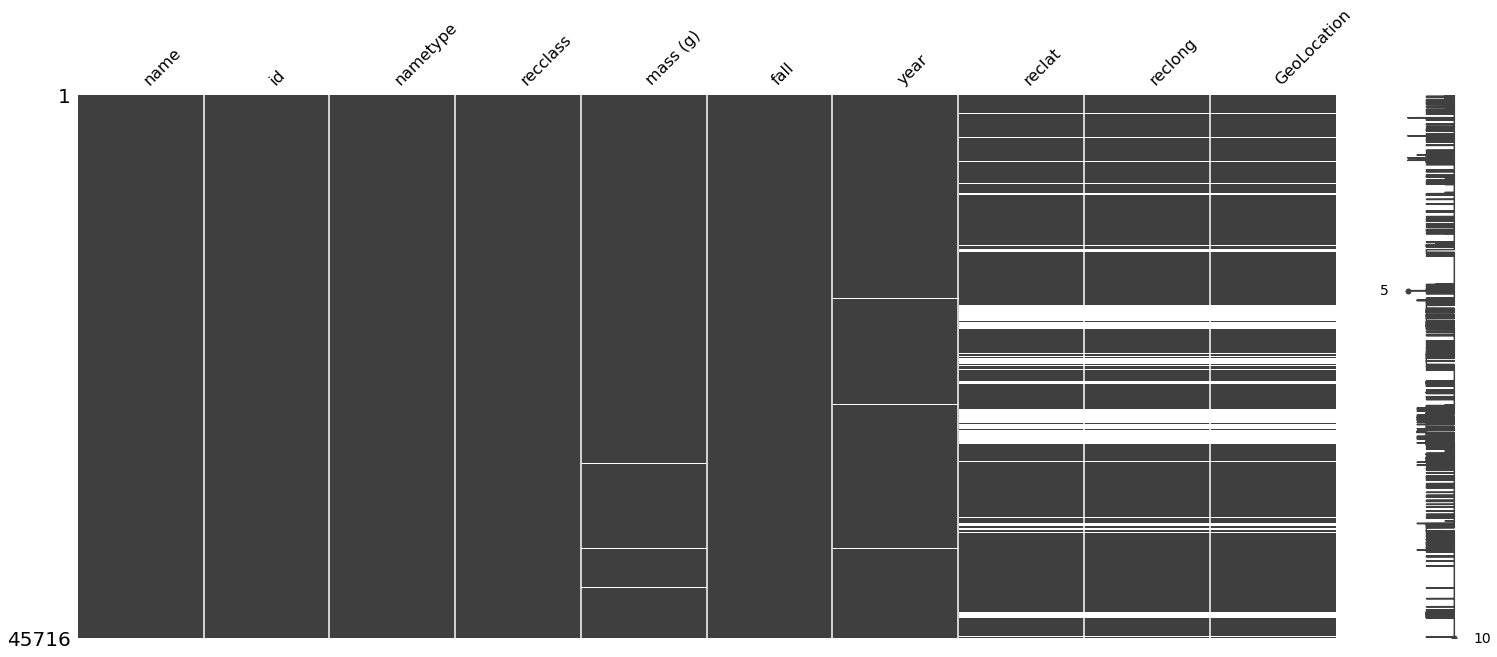

In [7]:
mgno.matrix(df)

In [8]:
df["reclat"].value_counts()

 0.00000     6438
-71.50000    4761
-84.00000    3040
-72.00000    1506
-79.68333    1130
             ... 
-84.60051       1
 20.93930       1
-76.26494       1
 40.37972       1
 2.00000        1
Name: reclat, Length: 12738, dtype: int64

In [9]:
df["reclong"].value_counts()

 0.000000      6214
 35.666670     4985
 168.000000    3040
 26.000000     1506
 159.750000     657
               ... 
 54.472611        1
 53.803920        1
-64.783330        1
 156.410380       1
 36.186110        1
Name: reclong, Length: 14640, dtype: int64

In [10]:
df.describe()

,id,mass (g),reclat,reclong
count,45716.000000,4.558500e+04,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,-39.122580,61.074319
std,16860.683030,5.749889e+05,46.378511,80.647298
min,1.000000,0.000000e+00,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,-76.714240,0.000000
50%,24261.500000,3.260000e+01,-71.500000,35.666670
75%,40656.750000,2.026000e+02,0.000000,157.166670
max,57458.000000,6.000000e+07,81.166670,354.473330


In [11]:
df.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')

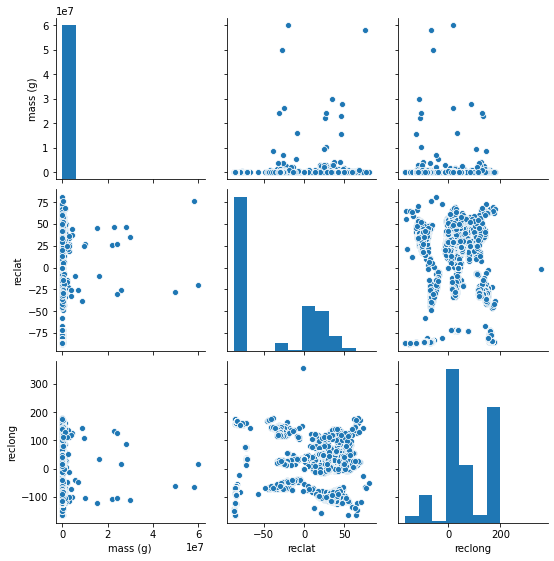

In [12]:
sns.pairplot(df[["mass (g)","reclat","reclong"]])

In [13]:
df_clean = df.copy()
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  object 
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 3.5+ MB


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [14]:
cols = ["name","nametype","recclass","fall","year","GeoLocation"]
df_clean[cols] = df_clean[cols].apply(lambda x : x.astype('category'))
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   name         45716 non-null  category
 1   id           45716 non-null  int64   
 2   nametype     45716 non-null  category
 3   recclass     45716 non-null  category
 4   mass (g)     45585 non-null  float64 
 5   fall         45716 non-null  category
 6   year         45425 non-null  category
 7   reclat       38401 non-null  float64 
 8   reclong      38401 non-null  float64 
 9   GeoLocation  38401 non-null  category
dtypes: category(6), float64(3), int64(1)
memory usage: 4.3 MB


In [15]:
df_clean.dropna(axis=0)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,01/01/1999 12:00:00 AM,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,01/01/1939 12:00:00 AM,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,01/01/2003 12:00:00 AM,49.78917,41.50460,"(49.78917, 41.5046)"


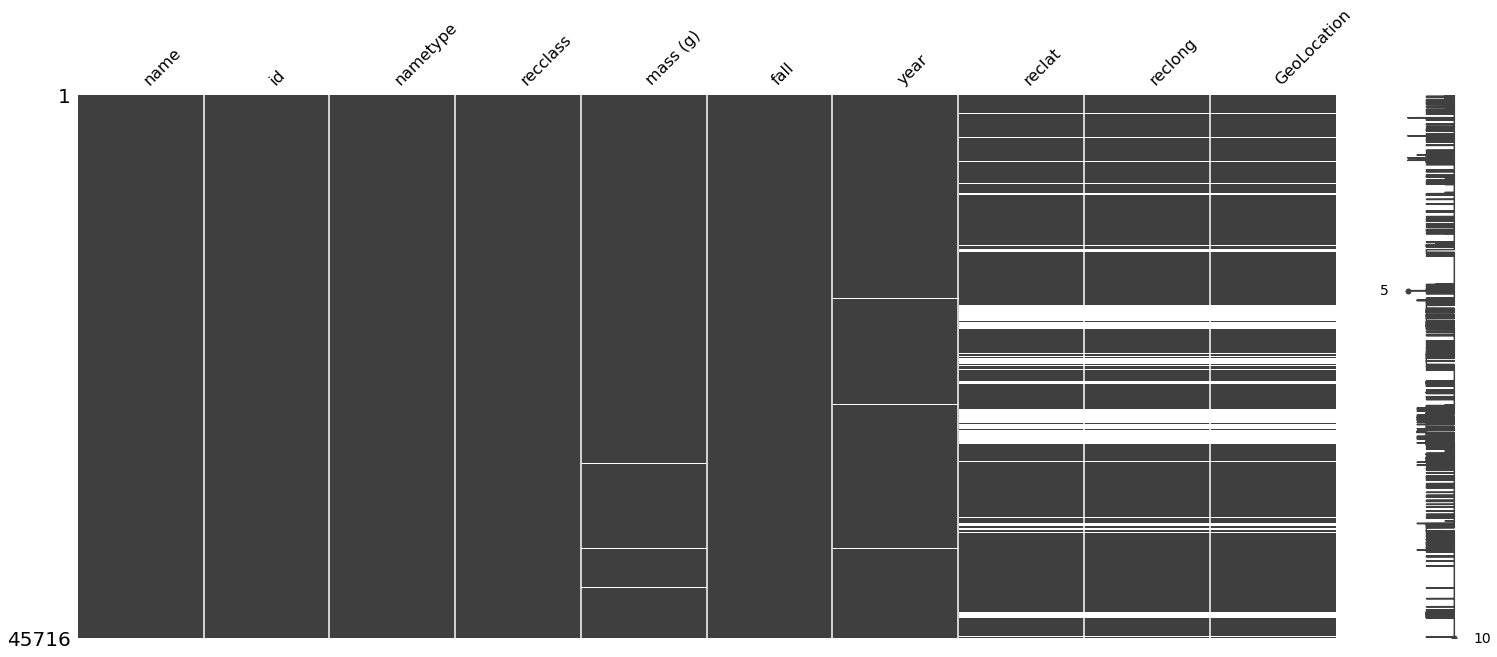

In [16]:
mgno.matrix(df_clean)

In [17]:
df_clean["year"].value_counts()

01/01/2003 12:00:00 AM    3323
01/01/1979 12:00:00 AM    3046
01/01/1998 12:00:00 AM    2697
01/01/2006 12:00:00 AM    2456
01/01/1988 12:00:00 AM    2296
                          ... 
01/01/1790 12:00:00 AM       1
01/01/1787 12:00:00 AM       1
01/01/1785 12:00:00 AM       1
01/01/1781 12:00:00 AM       1
01/01/1583 12:00:00 AM       1
Name: year, Length: 266, dtype: int64

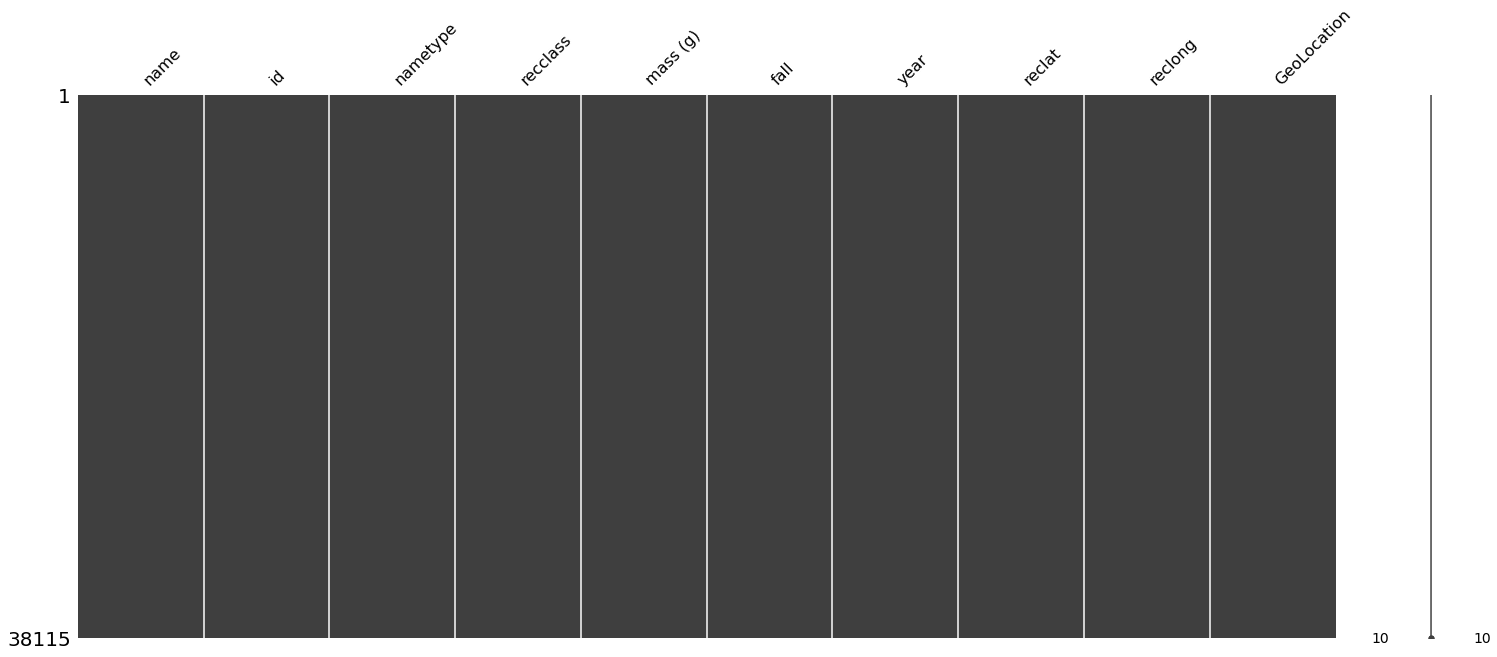

In [18]:
#print(df_clean[df_clean['year'].isnull()])
df_clean = df_clean.dropna(subset=['year'])
df_clean = df_clean.dropna(subset=['reclat'])
df_clean = df_clean.dropna(subset=['reclong'])
df_clean = df_clean.dropna(subset=['GeoLocation'])
df_clean = df_clean.dropna(subset=['mass (g)'])
mgno.matrix(df_clean)

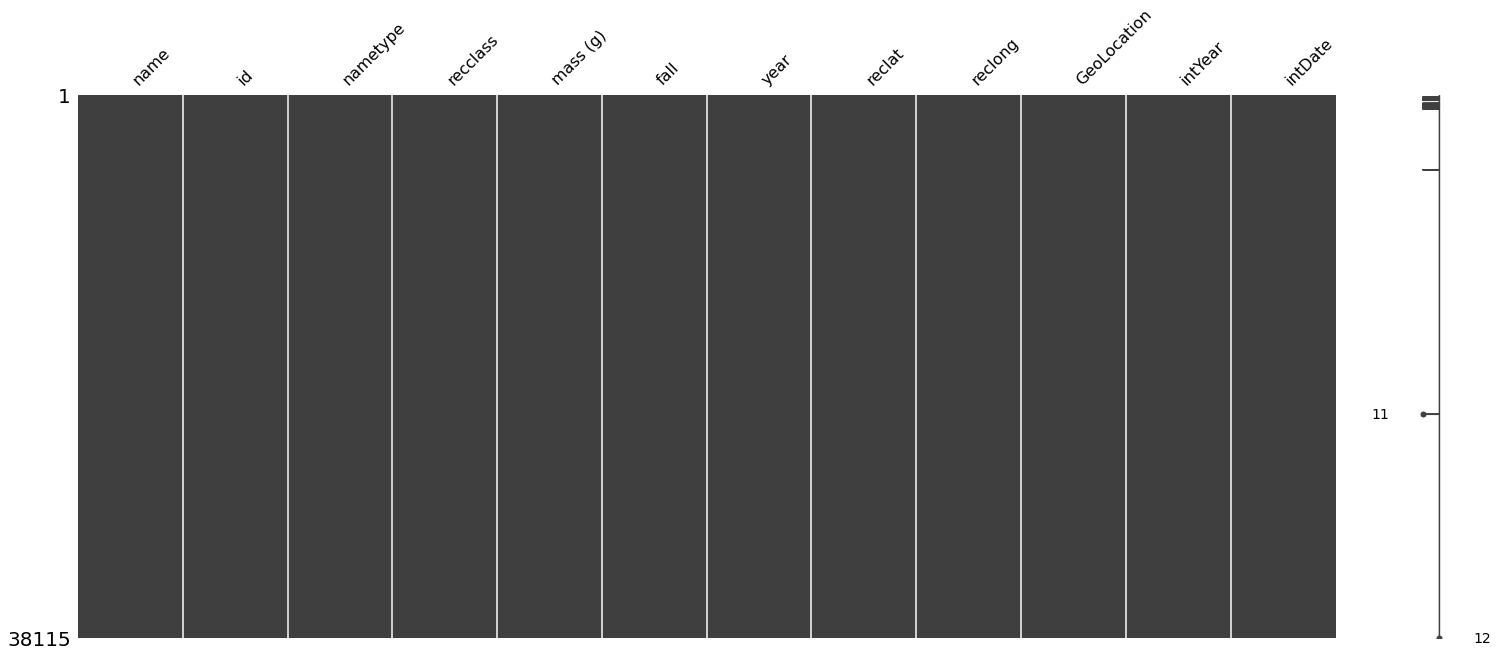

In [19]:
df_clean["intYear"] = df_clean["year"].str[6:11].astype(int)
df_clean['intDate'] = [df_clean["year"] if x >= 1677 else np.nan for x in df_clean['intYear']]

mgno.matrix(df_clean)

In [20]:
df_clean.size
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38115 entries, 0 to 45715
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   name         38115 non-null  category
 1   id           38115 non-null  int64   
 2   nametype     38115 non-null  category
 3   recclass     38115 non-null  category
 4   mass (g)     38115 non-null  float64 
 5   fall         38115 non-null  category
 6   year         38115 non-null  category
 7   reclat       38115 non-null  float64 
 8   reclong      38115 non-null  float64 
 9   GeoLocation  38115 non-null  category
 10  intYear      38115 non-null  int64   
 11  intDate      38101 non-null  object  
dtypes: category(6), float64(3), int64(2), object(1)
memory usage: 4.9+ MB


In [21]:
df_clean = df_clean.dropna(subset=['intDate'])

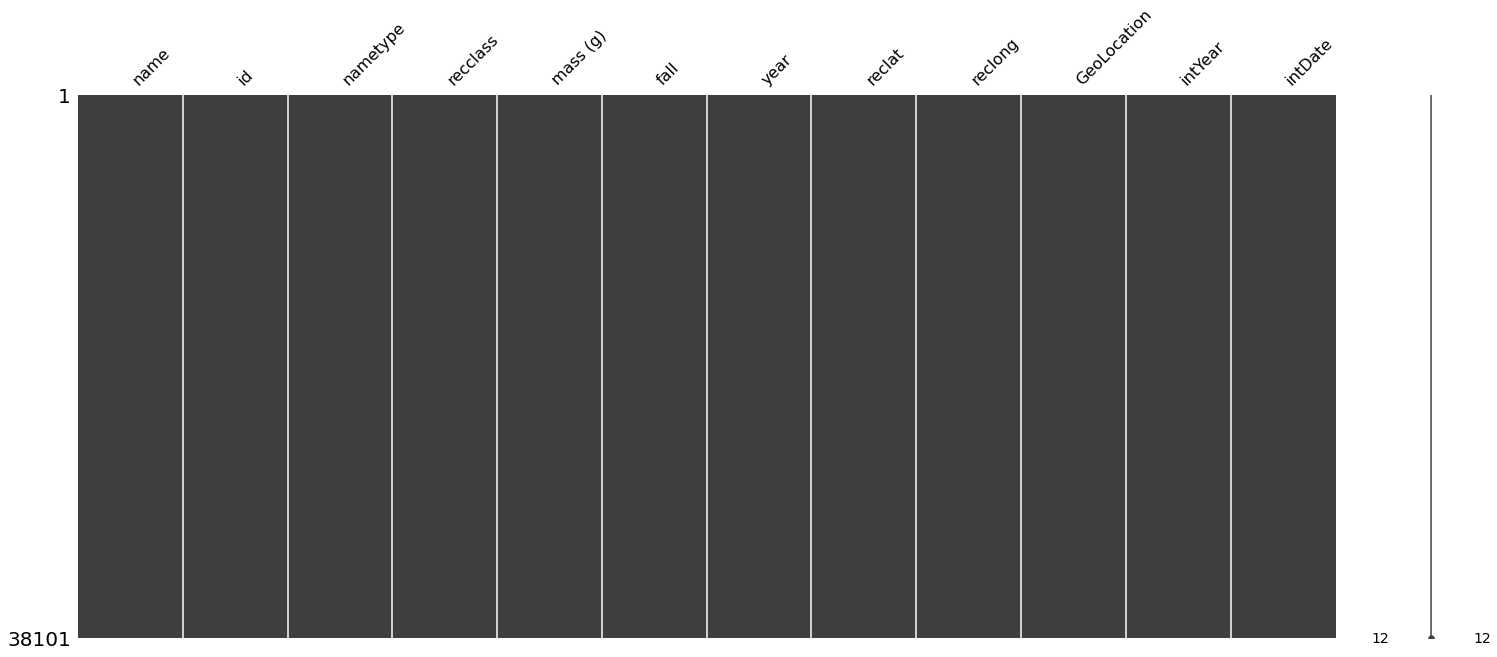

In [22]:
mgno.matrix(df_clean)

In [23]:
df_clean["year"] = pd.to_datetime(df_clean["year"], format='%d/%m/%Y %H:%M:%S %p')

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38101 entries, 0 to 45715
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         38101 non-null  category      
 1   id           38101 non-null  int64         
 2   nametype     38101 non-null  category      
 3   recclass     38101 non-null  category      
 4   mass (g)     38101 non-null  float64       
 5   fall         38101 non-null  category      
 6   year         38101 non-null  datetime64[ns]
 7   reclat       38101 non-null  float64       
 8   reclong      38101 non-null  float64       
 9   GeoLocation  38101 non-null  category      
 10  intYear      38101 non-null  int64         
 11  intDate      38101 non-null  object        
dtypes: category(5), datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 5.1+ MB


In [25]:
df_clean

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,intYear,intDate
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01 12:00:00,50.77500,6.08333,"(50.775, 6.08333)",1880,0 01/01/1880 12:00:00 AM 1 01/01...
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01 12:00:00,56.18333,10.23333,"(56.18333, 10.23333)",1951,0 01/01/1880 12:00:00 AM 1 01/01...
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01 12:00:00,54.21667,-113.00000,"(54.21667, -113.0)",1952,0 01/01/1880 12:00:00 AM 1 01/01...
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01 12:00:00,16.88333,-99.90000,"(16.88333, -99.9)",1976,0 01/01/1880 12:00:00 AM 1 01/01...
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01 12:00:00,-33.16667,-64.95000,"(-33.16667, -64.95)",1902,0 01/01/1880 12:00:00 AM 1 01/01...
...,...,...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990-01-01 12:00:00,29.03700,17.01850,"(29.037, 17.0185)",1990,0 01/01/1880 12:00:00 AM 1 01/01...
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999-01-01 12:00:00,13.78333,8.96667,"(13.78333, 8.96667)",1999,0 01/01/1880 12:00:00 AM 1 01/01...
45713,Zlin,30410,Valid,H4,3.3,Found,1939-01-01 12:00:00,49.25000,17.66667,"(49.25, 17.66667)",1939,0 01/01/1880 12:00:00 AM 1 01/01...
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003-01-01 12:00:00,49.78917,41.50460,"(49.78917, 41.5046)",2003,0 01/01/1880 12:00:00 AM 1 01/01...


In [26]:
df_clean.set_index('year')

,name,id,nametype,recclass,mass (g),fall,reclat,reclong,GeoLocation,intYear,intDate
year,,,,,,,,,,,
1880-01-01 12:00:00,Aachen,1,Valid,L5,21.0,Fell,50.77500,6.08333,"(50.775, 6.08333)",1880,0 01/01/1880 12:00:00 AM 1 01/01...
1951-01-01 12:00:00,Aarhus,2,Valid,H6,720.0,Fell,56.18333,10.23333,"(56.18333, 10.23333)",1951,0 01/01/1880 12:00:00 AM 1 01/01...
1952-01-01 12:00:00,Abee,6,Valid,EH4,107000.0,Fell,54.21667,-113.00000,"(54.21667, -113.0)",1952,0 01/01/1880 12:00:00 AM 1 01/01...
1976-01-01 12:00:00,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,16.88333,-99.90000,"(16.88333, -99.9)",1976,0 01/01/1880 12:00:00 AM 1 01/01...
1902-01-01 12:00:00,Achiras,370,Valid,L6,780.0,Fell,-33.16667,-64.95000,"(-33.16667, -64.95)",1902,0 01/01/1880 12:00:00 AM 1 01/01...
...,...,...,...,...,...,...,...,...,...,...,...
1990-01-01 12:00:00,Zillah 002,31356,Valid,Eucrite,172.0,Found,29.03700,17.01850,"(29.037, 17.0185)",1990,0 01/01/1880 12:00:00 AM 1 01/01...
1999-01-01 12:00:00,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,13.78333,8.96667,"(13.78333, 8.96667)",1999,0 01/01/1880 12:00:00 AM 1 01/01...
1939-01-01 12:00:00,Zlin,30410,Valid,H4,3.3,Found,49.25000,17.66667,"(49.25, 17.66667)",1939,0 01/01/1880 12:00:00 AM 1 01/01...


In [31]:
cap = fo.Map(zoom_start=6)

for index, row in df_clean.iterrows():
    fo.Marker(location=[row['reclat'], row['reclong']], popup=row['name']).add_to(cap)
cap.save(outfile='cap.html')